# AirBnB Fair Valuation

Welcome to Airbnb Analysis Corp.! Your task is to set the competitive **daily accomodation rate** for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a **fair value** that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!


1. The owner has been a host since **August 2010**
1. The location is **lon:151.274506, lat:33.889087**
1. The current review score rating **95.0**
1. Number of reviews **53**
1. Minimum nights **4**
1. The house can accomodate **10** people.
1. The owner currently charges a cleaning fee of **370**
1. The house has **3 bathrooms, 5 bedrooms, 7 beds**.
1. The house is available for **255 of the next 365 days**
1. The client is **verified**, and they are a **superhost**.
1. The cancelation policy is **strict with a 14 days grace period**.
1. The host requires a security deposit of **$1,500**


*All values strictly apply to the month of July 2018*

### Data Import and Preprocessing

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [4]:
#loading the data
url="https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"
print("Be patient: loading from github (2 minutes)")
df_1=pd.read_csv(url+'datasets/sydney_airbnb.csv')
print("Done")


Be patient: loading from github (2 minutes)
Done


In [5]:
df_1.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,As much as they want.,Be considerate. No showering after 2330h.,https://a0.muscache.com/im/pictures/2797669/17...,40855,https://www.airbnb.com/users/show/40855,Colleen,23/09/09,"Potts Point, New South Wales, Australia","Recently retired, I've lived & worked on 4 con...",within a day,67%,t,https://a0.muscache.com/im/users/40855/profile...,https://a0.muscache.com/im/users/40855/profile...,Potts Point,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Potts Point, NSW, Australia",Potts Point,Sydney,NaN,Potts Point,NSW,2011,Sydney,"Potts Point, Australia",AU,Australia,-33.869168,151.226562,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{TV,Kitchen,Elevator,""Buzzer/wireless intercom...",NaN,$65.00,NaN,NaN,NaN,NaN,1,$0.00,2,180,4 weeks ago,t,9,39,69,339,177,5/12/09,1/07/18,92.0,9.0,9.0,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,As much or as little as you like. We live here...,We look forward to welcoming you to stay you j...,https://a0.muscache.com/im/pictures/763ad5c8-c...,17061,https://www.airbnb.com/users/show/17061,Stuart,14/05/09,"Sydney, New South Wales, Australia","G'Day from Australia!\r\n\r\nHe's Vinh, and I'...",within an hour,100%,f,https://a0.muscache.com/im/users/17061/profile...,https://a0.muscache.com/im/users/17061/profile...,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Pyrmont, NSW, Australia",Pyrmont,Sydney,NaN,Pyrmont,NSW,2009,Sydney,"Pyrmont, Australia",AU,Australia,-33.865153,151.191896,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Paid par...",NaN,$98.00,$800.00,NaN,$0.00,$55.00,2,$395.00,2,7,yesterday,t,13,30,45,188,468,24/07/10,27/06/18,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully reno

In [6]:
df_1.shape

(27070, 84)

In [7]:
df_1.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'c

In [8]:
# We select only a small number of features as the others we can discard for this study
incl = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"] 

df = df_1[incl]

In [9]:
df.shape

(27070, 20)

In [10]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,30/11/09,moderate


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   27070 non-null  object 
 1   city                    27037 non-null  object 
 2   longitude               27070 non-null  float64
 3   latitude                27070 non-null  float64
 4   review_scores_rating    19512 non-null  float64
 5   number_of_reviews       27070 non-null  int64  
 6   minimum_nights          27070 non-null  int64  
 7   security_deposit        16722 non-null  object 
 8   cleaning_fee            19250 non-null  object 
 9   accommodates            27070 non-null  int64  
 10  bathrooms               27048 non-null  float64
 11  bedrooms                27062 non-null  float64
 12  beds                    27037 non-null  float64
 13  property_type           27070 non-null  object 
 14  room_type               27070 non-null

In [12]:
# change price,security_deposit, cleaning_fee from str to float and remove $ sign
df.price=df.price.str.replace('$','').str.replace(',','').astype(float)
df.security_deposit=df.security_deposit.str.replace('$','').str.replace(',','').astype(float)
df.cleaning_fee=df.cleaning_fee.str.replace('$','').str.replace(',','').astype(float)


In [13]:
# change host_since from str to datetime
df.host_since=pd.to_datetime(df.host_since)

In [14]:
df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   27070 non-null  float64       
 1   city                    27037 non-null  object        
 2   longitude               27070 non-null  float64       
 3   latitude                27070 non-null  float64       
 4   review_scores_rating    19512 non-null  float64       
 5   number_of_reviews       27070 non-null  int64         
 6   minimum_nights          27070 non-null  int64         
 7   security_deposit        16722 non-null  float64       
 8   cleaning_fee            19250 non-null  float64       
 9   accommodates            27070 non-null  int64         
 10  bathrooms               27048 non-null  float64       
 11  bedrooms                27062 non-null  float64       
 12  beds                    27037 non-null  float6

In [15]:
#unique count on each coloumn
df.nunique()

price                       735
city                        741
longitude                 26864
latitude                  27041
review_scores_rating         49
number_of_reviews           266
minimum_nights               68
security_deposit            272
cleaning_fee                328
accommodates                 16
bathrooms                    18
bedrooms                     12
beds                         18
property_type                39
room_type                     3
availability_365            366
host_identity_verified        2
host_is_superhost             2
host_since                 2590
cancellation_policy           5
dtype: int64

In [16]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

security_deposit          10348
cleaning_fee               7820
review_scores_rating       7558
host_since                   35
host_is_superhost            35
host_identity_verified       35
city                         33
beds                         33
bathrooms                    22
bedrooms                      8
property_type                 0
availability_365              0
room_type                     0
price                         0
accommodates                  0
minimum_nights                0
number_of_reviews             0
latitude                      0
longitude                     0
cancellation_policy           0
dtype: int64

In [17]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)


,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,2009-09-23,moderate
3,63.0,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,2009-11-30,moderate
4,39.0,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,2009-11-30,moderate
5,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,285,t,f,2009-03-12,strict_14_with_grace_period
6,451.0,Balmain,151.172753,-33.859072,96.0,15,7,800.0,NaN,8,2.0,4.0,4.0,House,Entire home/apt,175,t,t,2009-12-19,strict_14_with_grace_period
7,65.0,Bellevue Hill,151.259404,-33.889087,94.0,38,1,NaN,20.0,2,1.0,1.0,1.0,Apartment,Private room,35,t,f,2010-04-19,moderate
13,139.0,Mosman,151.236525,-33.819268,90.0,218,2,NaN,NaN,4,1.0,1.0,4.0,Apartment,Entire home/apt,269,t,f,2010-06-11,moderate
14,1045.0,Bondi Junction,151.242593,-33.891763,NaN,0,7,NaN,NaN,8,2.0,4.0,5.0,House,Entire home/apt,365,t,f,2010-09-11,strict_14_with_grace_period
17,111.0,Sydney,151.268865,-33.885690,89.0,11,4,NaN,100.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,14,f,f,2010-12-14,strict_14_with_grace_period
19,76.0,Alexandria,151.191237,-33.903964,93.0,81,2,NaN,20.0,2,1.0,1.0,1.0,House,Private room,52,t,f,2010-12-18,strict_14_with_grace_period


**Imputing Numerical Missing Values**

In [19]:
#missing values numerical and imputing missing values
df.select_dtypes(include=['float','int']).isnull().sum()


price                       0
longitude                   0
latitude                    0
review_scores_rating     7558
number_of_reviews           0
minimum_nights              0
security_deposit        10348
cleaning_fee             7820
accommodates                0
bathrooms                  22
bedrooms                    8
beds                       33
availability_365            0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='mean')
var=['security_deposit','cleaning_fee','review_scores_rating']
df[var]=SI.fit_transform(df[var])

In [21]:
SI=SimpleImputer(strategy='most_frequent')
var=['bathrooms','bedrooms','beds']
df[var]=SI.fit_transform(df[var])

**Imputing categorical Missing Values**

In [23]:
df.select_dtypes('object').isnull().sum()

city                      33
property_type              0
room_type                  0
host_identity_verified    35
host_is_superhost         35
cancellation_policy        0
dtype: int64

In [24]:
var=df.select_dtypes('object').columns
SI=SimpleImputer(strategy='most_frequent')
var=df.select_dtypes('object').columns
df[var]=SI.fit_transform(df[var])


In [25]:
df.isnull().sum()
#df.head()

price                      0
city                       0
longitude                  0
latitude                   0
review_scores_rating       0
number_of_reviews          0
minimum_nights             0
security_deposit           0
cleaning_fee               0
accommodates               0
bathrooms                  0
bedrooms                   0
beds                       0
property_type              0
room_type                  0
availability_365           0
host_identity_verified     0
host_is_superhost          0
host_since                35
cancellation_policy        0
dtype: int64

In [26]:
# To check any duplicate rows
df.duplicated().sum()

0

### Basic Statistical Details

In [28]:
# Statistical Details of numerical Columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
price,27070.0,209.278796,0.0,80.0,135.0,229.0,12999.0,304.336271
longitude,27070.0,151.210667,150.644964,151.184472,151.223242,151.264888,151.339811,0.079451
latitude,27070.0,-33.862368,-34.135212,-33.897603,-33.883064,-33.83185,-33.389728,0.07226
review_scores_rating,27070.0,93.412413,20.0,93.0,93.412413,99.0,100.0,7.942287
number_of_reviews,27070.0,14.005689,0.0,0.0,3.0,13.0,468.0,29.808917
minimum_nights,27070.0,4.504211,1.0,1.0,2.0,5.0,1000.0,14.550036
security_deposit,27070.0,494.982897,0.0,200.0,494.982897,494.982897,7000.0,540.374367
cleaning_fee,27070.0,93.759481,0.0,50.0,93.759481,100.0,999.0,77.33962
accommodates,27070.0,3.383598,1.0,2.0,2.0,4.0,16.0,2.196864
bathrooms,27070.0,1.35205,0.0,1.0,1.0,1.5,10.0,0.663898


In [29]:
#Statistical Details of categorical Columns
str_cols=df.select_dtypes("object").columns
df[str_cols].describe().T

,count,unique,top,freq
city,27070,741,Bondi Beach,1709
property_type,27070,39,Apartment,15921
room_type,27070,3,Entire home/apt,16919
host_identity_verified,27070,2,f,14358
host_is_superhost,27070,2,f,23651
cancellation_policy,27070,5,strict_14_with_grace_period,11692


<Axes: ylabel='price'>

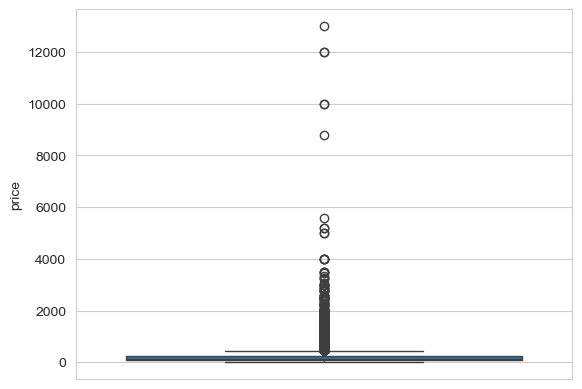

In [30]:
# use boxplot to check outliers in Price
sns.boxplot(df.price)

In [31]:
# skew describes asymmasymmetry of data distribution/outliers that affect or are affected by the skewness in a dataset/. (moderate: -2 to+2)
df.price.skew()

13.808558337216192

* outliers affect the distribution

In [33]:
# We can also use Kurtosis to analyze our data
# “Kurtosis is the degree of peakedness of a distribution” /significant presense of outliers/. (moderate: 3 to 6)
df.price.kurtosis()

413.4301463784445

In [34]:
#outlier treating
## So in order to remove or filter out our high value 'outliers' let's consider taking our data from the 99% percentile
## This function returns the highest value of the 99percentile which is still relatively high when compared to the mean and median
print(df["price"].quantile(0.98))
print(df["price"].mean())
print(df["price"].median())

990.0
209.27879571481344
135.0


In [35]:
# Now we remove all prices over the 98 percentile (or in order words, we keep all data rows under the 99% value of 1050)
df2 = df[df["price"]<df["price"].quantile(0.98)].reset_index(drop=True)

In [36]:
print(df2.price.skew())
print(df2.price.kurtosis())

2.170503186501854
5.362993291831394


*  moderate range

In [38]:
print(df2.cleaning_fee.skew())
print(df2.cleaning_fee.kurtosis())

2.3267851899988297
9.153641666978096


In [39]:
#outliers in security_deposit
print(df2.security_deposit.skew())
print(df2.security_deposit.kurtosis())
print(df2["security_deposit"].quantile(0.995))
print(df2["security_deposit"].mean())
print(df2["security_deposit"].median())

4.636223961492891
39.76321872202202
3000.0
462.5118067830073
494.9828967826815


In [40]:
# Now we remove all security_deposit over the 99 percentile
df3 = df2[df2["security_deposit"]<df2["security_deposit"].quantile(0.99)].reset_index(drop=True)
print(df3.security_deposit.skew())
print(df3.security_deposit.kurtosis())

0.9757216297438059
2.7467533759329066


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25984 entries, 0 to 25983
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   25984 non-null  float64       
 1   city                    25984 non-null  object        
 2   longitude               25984 non-null  float64       
 3   latitude                25984 non-null  float64       
 4   review_scores_rating    25984 non-null  float64       
 5   number_of_reviews       25984 non-null  int64         
 6   minimum_nights          25984 non-null  int64         
 7   security_deposit        25984 non-null  float64       
 8   cleaning_fee            25984 non-null  float64       
 9   accommodates            25984 non-null  int64         
 10  bathrooms               25984 non-null  float64       
 11  bedrooms                25984 non-null  float64       
 12  beds                    25984 non-null  float6

In [42]:
print(df3.cancellation_policy.nunique(),df3["cancellation_policy"].value_counts(),"\n")
print(df3["city"].nunique(),df3["city"].value_counts(),"\n")
print(df3["property_type"].nunique(),df3["property_type"].value_counts(),'\n')
print(df3["room_type"].nunique(),df3["room_type"].value_counts())

5 cancellation_policy
strict_14_with_grace_period    10899
flexible                        8386
moderate                        6684
super_strict_60                   14
super_strict_30                    1
Name: count, dtype: int64 

732 city
Bondi Beach        1659
Surry Hills         911
Manly               909
Bondi               768
Randwick            673
                   ... 
Kareela, Sydney       1
rooty hill            1
Bronte                1
Pitt Town             1
Kensignton            1
Name: count, Length: 732, dtype: int64 

39 property_type
Apartment                 15705
House                      7050
Townhouse                  1123
Condominium                 347
Guest suite                 346
Guesthouse                  286
Villa                       172
Loft                        169
Bed and breakfast           155
Other                       143
Bungalow                    117
Cabin                        75
Serviced apartment           74
Cottage           

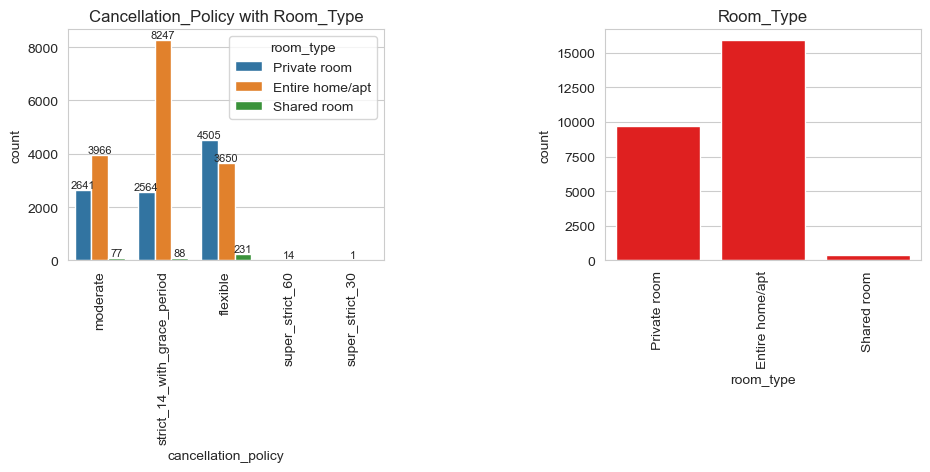

In [43]:
plt.figure(figsize=(11,3))
plt.subplot(121)
plot=sns.countplot(data=df3,x='cancellation_policy',hue='room_type')
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=8)
plt.xticks(rotation=90)
plt.title('Cancellation_Policy with Room_Type')

plt.subplot(122)
sns.countplot(data=df3,x='room_type',color='red')
plt.xticks(rotation=90)
plt.title('Room_Type')

plt.subplots_adjust(wspace=0.7)



Text(0.5, 1.0, 'Top_20_Cities')

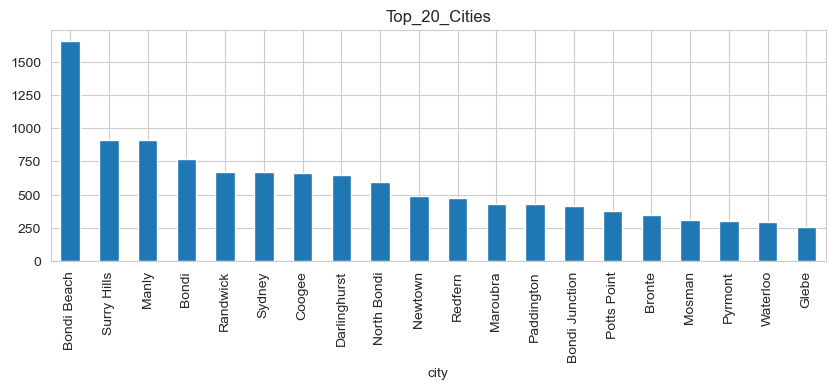

In [44]:
plt.figure(figsize=(10,3))
Top_city=df3.city.value_counts().head(20)
Top_city.plot.bar()
plt.title('Top_20_Cities')

In [45]:
Top_city

city
Bondi Beach       1659
Surry Hills        911
Manly              909
Bondi              768
Randwick           673
Sydney             672
Coogee             661
Darlinghurst       651
North Bondi        593
Newtown            487
Redfern            472
Maroubra           433
Paddington         431
Bondi Junction     411
Potts Point        373
Bronte             345
Mosman             311
Pyrmont            299
Waterloo           296
Glebe              256
Name: count, dtype: int64

In [46]:
#top 20 sydney location
df4 = df3[df3["city"].isin(Top_city.index)].reset_index(drop=True)

Text(0, 0.5, 'Average_price')

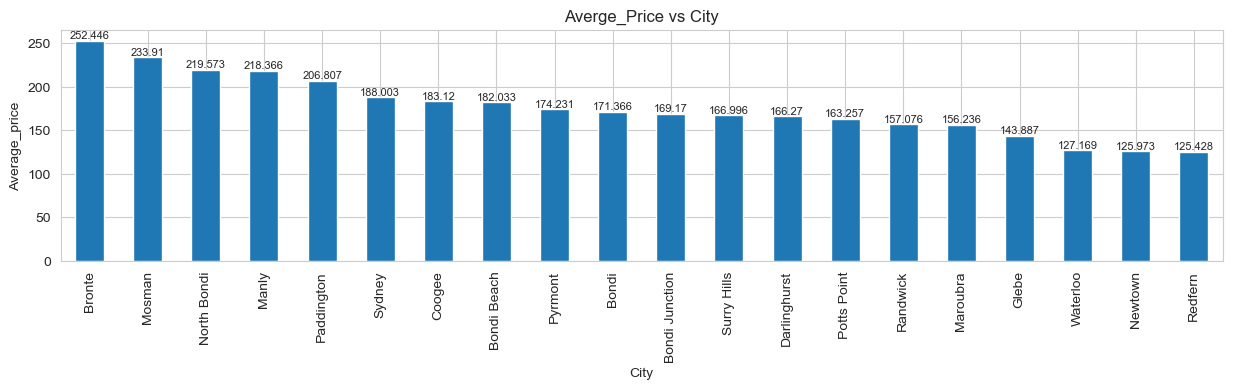

In [47]:
plt.figure(figsize=(15,3))
plot=df4.groupby('city')['price'].mean().sort_values(ascending=False).plot.bar()
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=8)
plt.title('Averge_Price vs City')
plt.xlabel('City',fontsize=10)
plt.ylabel('Average_price',fontsize=10)

In [48]:
# We now remove the rare occurences in property_type
item_counts = df4['property_type'].value_counts().head(16)
#print(item_counts)
#top 15 property_type
df4 = df4[df4["property_type"].isin(item_counts.index)].reset_index(drop=True)
#df4.property_type.value_counts()

Text(0, 0.5, 'Maximum_price')

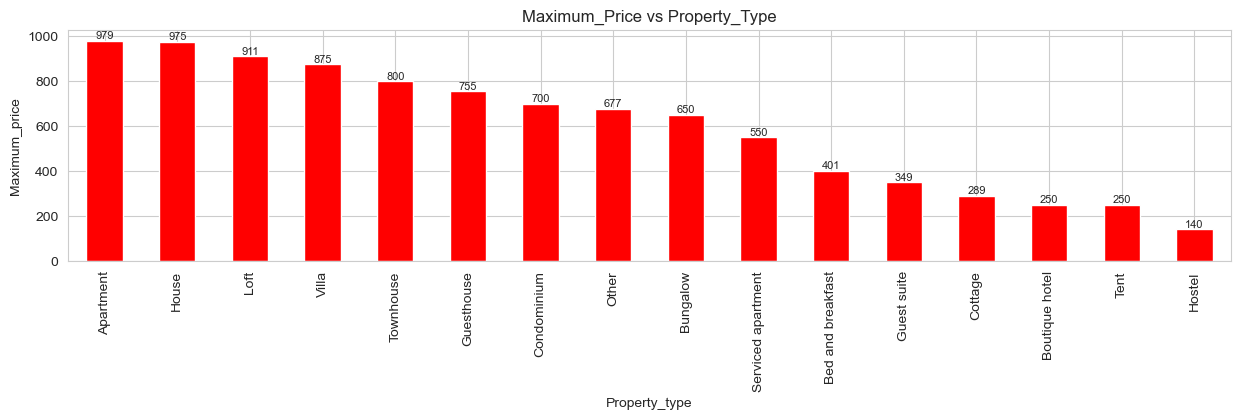

In [49]:
plt.figure(figsize=(15,3))
plot=df4.groupby('property_type')['price'].max().sort_values(ascending=False).plot.bar(color='red')
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=8)
plt.title('Maximum_Price vs Property_Type')
plt.xlabel('Property_type',fontsize=10)
plt.ylabel('Maximum_price',fontsize=10)

## Model Development and Evaluation

### Encoding Categorical Variables

In [52]:
# string columns
print(df4[str_cols].nunique())


city                      20
property_type             16
room_type                  3
host_identity_verified     2
host_is_superhost          2
cancellation_policy        4
dtype: int64


In [53]:
##  Similar to above encoding, here we encode binary 1 to t and 0 to f. 
df4["host_identity_verified"] = df4["host_identity_verified"].apply(lambda x: 1 if x=="t" else 0)
df4["host_is_superhost"] = df4["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)

In [54]:
df5=df4.drop(columns=['host_since'],axis=1)
#df5.info()

In [55]:
# OrdinalEncoder can be used to encode multiple categorical features
# label Encoder
from sklearn.preprocessing import LabelEncoder
encoder={}
cat_cols=['city','property_type','room_type','cancellation_policy']
for x in cat_cols:
   encoder[x]=LabelEncoder()
   df5[x]=encoder[x].fit_transform(df5[x])
   print('\n',x,'\n','**************')
   for index,value in enumerate(encoder[x].classes_):
       print(value,':',index)
       


 city 
 **************
Bondi : 0
Bondi Beach : 1
Bondi Junction : 2
Bronte : 3
Coogee : 4
Darlinghurst : 5
Glebe : 6
Manly : 7
Maroubra : 8
Mosman : 9
Newtown : 10
North Bondi : 11
Paddington : 12
Potts Point : 13
Pyrmont : 14
Randwick : 15
Redfern : 16
Surry Hills : 17
Sydney : 18
Waterloo : 19

 property_type 
 **************
Apartment : 0
Bed and breakfast : 1
Boutique hotel : 2
Bungalow : 3
Condominium : 4
Cottage : 5
Guest suite : 6
Guesthouse : 7
Hostel : 8
House : 9
Loft : 10
Other : 11
Serviced apartment : 12
Tent : 13
Townhouse : 14
Villa : 15

 room_type 
 **************
Entire home/apt : 0
Private room : 1
Shared room : 2

 cancellation_policy 
 **************
flexible : 0
moderate : 1
strict_14_with_grace_period : 2
super_strict_60 : 3


In [56]:
encoder

{'city': LabelEncoder(),
 'property_type': LabelEncoder(),
 'room_type': LabelEncoder(),
 'cancellation_policy': LabelEncoder()}

### Train-Test_split

In [58]:
# separate independent and dependent var
x = df5.drop(columns=['price'],axis=1)
y = df5.price

In [59]:
# if required use StandardScaler() here on independent_var (x) only

In [60]:
#import library
from sklearn.model_selection import train_test_split

In [61]:
#split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=40) 

### Training Algorithm-LinearRegression

In [63]:
# import libraries
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [64]:
#Prediction
y_predict = lr_model.predict(x_test)

In [65]:
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
5872,250.0,123.790401
3316,700.0,542.636491
11572,160.0,254.118365
5268,74.0,130.272958
4392,260.0,220.776687


#### Evaluating the Model :

In [67]:
# Confusion_Matrix, Classification_Report and accuracy_score are for categorical target variables (Classification problem)
# MSE, RMSE, MAE and R*2 are for Continuous Target Variables (Regression problem)

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
lr_mse=mean_squared_error(y_test, y_predict)
lr_rmse=np.sqrt(lr_mse)
lr_mae=mean_absolute_error(y_test,y_predict)
lr_r2=r2_score(y_test,y_predict)
print('\n mean_squared_error:',lr_mse,'\n root_mean_squared_error:',lr_rmse,'\n mean_absolute error:',lr_mae,'\nr2_score:',lr_r2,'\n')


 mean_squared_error: 8225.261450788717 
 root_mean_squared_error: 90.6932271494885 
 mean_absolute error: 59.24387661140587 
r2_score: 0.6034659494527143 



In [69]:
#Cross-validation is a technique used in machine learning and statistics to assess how well a model generalizes to an independent dataset. 
#It helps to evaluate the performance of a model by partitioning the data into training and testing sets multiple times and averaging the results.
#This process helps in identifying issues like overfitting or underfitting.

from sklearn.model_selection import KFold,cross_val_score
# Define KFold cross-validation parameters
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
lr_scores = cross_val_score(lr_model, x ,y,cv=kf)

In [70]:
print("\nCross-validation-accuracy-scores:", lr_scores)
print('Mean accuracy:', lr_scores.mean())
print("Standard deviation: ",lr_scores.std(),'\n')


Cross-validation-accuracy-scores: [0.59763327 0.58861151 0.61718014 0.61730121 0.58181398]
Mean accuracy: 0.6005080199399224
Standard deviation:  0.014554923082302955 



* lr_model is underfit .
* the relatively low mean accuracy suggest that the lr_model is not performing well
* possibly due to its inability to learn the complexities of the data

### Training Algorithm-DecisionTreeRegressor

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtree_model= DecisionTreeRegressor(random_state=42)
dtree_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [74]:
#prediction
y_predict=dtree_model.predict(x_test)

In [75]:
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
5872,250.0,175.0
3316,700.0,425.0
11572,160.0,185.0
5268,74.0,139.0
4392,260.0,200.0


#### Evaluating the Model

In [77]:
# MSE, RMSE, MAE
dtree_mse=mean_squared_error(y_test, y_predict)
dtree_rmse=np.sqrt(dtree_mse)
dtree_mae=mean_absolute_error(y_test,y_predict)
dtree_r2=r2_score(y_test,y_predict)
print('\n mean_squared_error:',dtree_mse,'\n root_mean_squared_error:',dtree_rmse,'\n mean_absolute error:',dtree_mae,'\nr2_score:',dtree_r2,'\n')


 mean_squared_error: 14578.639815880322 
 root_mean_squared_error: 120.74203831259568 
 mean_absolute error: 74.8601841196778 
r2_score: 0.29717406160911397 



In [78]:
# Cross_validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
dtree_scores = cross_val_score(dtree_model, x ,y,cv=kf)
print("\nCross-validation-accuracy-scores:",dtree_scores)
print('Mean accuracy:\t', dtree_scores.mean())
print("Standard deviation:\t ",dtree_scores.std(),'\n')


Cross-validation-accuracy-scores: [0.26653995 0.26196947 0.23694352 0.31251314 0.29496564]
Mean accuracy:	 0.27458634287183525
Standard deviation:	  0.02643736162370862 



* dtree_model is underfit
* The dtree_model is not achieving high accuracy and the performance is uniformly poor

### Training Algorithm-RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [82]:
#prediction
y_predict=dtree_model.predict(x_test)

In [83]:
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
5872,250.0,175.0
3316,700.0,425.0
11572,160.0,185.0
5268,74.0,139.0
4392,260.0,200.0


#### Evaluating the Model

In [85]:
# MSE, RMSE, MAE
rf_mse=mean_squared_error(y_test, y_predict)
rf_rmse=np.sqrt(rf_mse)
rf_mae=mean_absolute_error(y_test,y_predict)
rf_r2=r2_score(y_test,y_predict)
print('\n mean_squared_error:',rf_mse,'\n root_mean_squared_error:',rf_rmse,'\n mean_absolute error:',rf_mae,'\nr2_score:',rf_r2,'\n')


 mean_squared_error: 14578.639815880322 
 root_mean_squared_error: 120.74203831259568 
 mean_absolute error: 74.8601841196778 
r2_score: 0.29717406160911397 



In [86]:
 #Cross_validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
rf_scores = cross_val_score(rf_model, x ,y,cv=kf)
print("\nCross-validation-accuracy-scores:",rf_scores)
print('Mean accuracy:\t', rf_scores.mean())
print("Standard deviation:\t ",rf_scores.std(),'\n')


Cross-validation-accuracy-scores: [0.638753   0.62908187 0.65865434 0.66348322 0.62571724]
Mean accuracy:	 0.6431379336745863
Standard deviation:	  0.015329521274245392 



* rf_model is underfit .
* the relatively low mean accuracy suggest that the rf_model is not performing well
* possibly due to its inability to learn the complexities of the data

## Hyper-Parameter Tuning
**To find the best combination of hyper parameters to optimize the model's performance**

**GridSearch and RandomSearch**

### Grid_Search

In [90]:
# GRID_SEARCH
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rf_model_1 = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rf_model_1, param_grid, cv=5,return_train_score=True)
grid_search.fit( x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [91]:
#The best hyperparameter combination found:
print('\n The best hyperparameter combination found:')
print('\n Best parameter:',grid_search.best_params_)
print('\n Best estimator:',grid_search.best_estimator_)


 The best hyperparameter combination found:

 Best parameter: {'max_features': 4, 'n_estimators': 30}

 Best estimator: RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)


In [92]:
# Top five results as presented in a dataframe
#pd.DataFrame(grid_search.cv_results_).head(5)

In [93]:
#prediction
best_model=grid_search.best_estimator_
y_predict=best_model.predict(x_test)
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()


,Actual_data,Predicted_data
5872,250.0,90.033333
3316,700.0,515.566667
11572,160.0,196.233333
5268,74.0,116.100000
4392,260.0,267.933333


In [94]:
#### Evaluating the Model

In [95]:
# MSE, RMSE, MAE
rf1_mse=mean_squared_error(y_test, y_predict)
rf1_rmse=np.sqrt(rf1_mse)
rf1_mae=mean_absolute_error(y_test,y_predict)
rf1_r2=r2_score(y_test,y_predict)
print('\n mean_squared_error:',rf1_mse,'\n root_mean_squared_error:',rf1_rmse,'\n mean_absolute error:',rf1_mae,'\nr2_score:',rf1_r2,'\n')


 mean_squared_error: 7300.048702851298 
 root_mean_squared_error: 85.44032246457932 
 mean_absolute error: 54.12121212121212 
r2_score: 0.6480698031724559 



In [96]:
 #Cross_validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
rf1_scores = cross_val_score(best_model, x ,y,cv=kf)
print("\nCross-validation-accuracy-scores:",rf1_scores)
print('Mean accuracy:\t', rf1_scores.mean())
print("Standard deviation:\t ",rf1_scores.std(),'\n')


Cross-validation-accuracy-scores: [0.64429869 0.64253886 0.66659914 0.65687597 0.63127857]
Mean accuracy:	 0.6483182439796249
Standard deviation:	  0.012225663006070545 



### Random_Search

In [98]:
# RANDOM_SEARCH
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rf_model_2 = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(rf_model_2, param_distributions=param_distribs, n_iter=5, cv=5, random_state=42)
rnd_search.fit( x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F1BB056CF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F1CE787BC0>},
                   random_state=42)

In [99]:
#The best hyperparameter combination found:
print('\n The best hyperparameter combination found:')
print('\n Best parameter:',rnd_search.best_params_)
print('\n Best estimator:',rnd_search.best_estimator_)


 The best hyperparameter combination found:

 Best parameter: {'max_features': 7, 'n_estimators': 122}

 Best estimator: RandomForestRegressor(max_features=7, n_estimators=122, random_state=42)


In [100]:
# Top five results as presented in a dataframe
#pd.DataFrame(rnd_search.cv_results_).head(5)

In [101]:
#prediction
best_model_2=rnd_search.best_estimator_
y_predict=best_model_2.predict(x_test)
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()


,Actual_data,Predicted_data
5872,250.0,116.745902
3316,700.0,531.221311
11572,160.0,221.467213
5268,74.0,125.745902
4392,260.0,256.254098


#### Evaluating the Model

In [103]:
# MSE, RMSE, MAE
rf2_mse=mean_squared_error(y_test, y_predict)
rf2_rmse=np.sqrt(rf2_mse)
rf2_mae=mean_absolute_error(y_test,y_predict)
rf2_r2=r2_score(y_test,y_predict)
print('\n mean_squared_error:',rf2_mse,'\n root_mean_squared_error:',rf2_rmse,'\n mean_absolute error:',rf2_mae,'\nr2_score:',rf2_r2,'\n')


 mean_squared_error: 7221.079847290083 
 root_mean_squared_error: 84.97693714938238 
 mean_absolute error: 53.310390688373666 
r2_score: 0.6518768359762301 



In [104]:
#Cross_validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
rf2_scores = cross_val_score(best_model_2, x ,y,cv=kf)
print("\nCross-validation-accuracy-scores:",rf2_scores)
print('Mean accuracy:\t', rf2_scores.mean())
print("Standard deviation:\t ",rf2_scores.std(),'\n')


Cross-validation-accuracy-scores: [0.65347705 0.64814097 0.66950308 0.67532302 0.63565285]
Mean accuracy:	 0.6564193929273333
Standard deviation:	  0.014401174325250997 



### Final_model selection

In [106]:
# Dataframe to select the final_model
result=pd.DataFrame({'Model':['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GridSearch','RandomizedSearch'],
                     'MSE':[lr_mse,dtree_mse,rf_mse,rf1_mse,rf2_mse],
                     'RMSE':[lr_rmse,dtree_rmse,rf_rmse,rf1_rmse,rf2_rmse],
                     'MAE':[lr_mae,dtree_mae,rf_mae,rf1_mae,rf2_mae],
                     'r2_score':[lr_r2,dtree_r2,rf_r2,rf1_r2,rf2_r2]})
result                    

,Model,MSE,RMSE,MAE,r2_score
0,LinearRegression,8225.261451,90.693227,59.243877,0.603466
1,DecisionTreeRegressor,14578.639816,120.742038,74.860184,0.297174
2,RandomForestRegressor,14578.639816,120.742038,74.860184,0.297174
3,GridSearch,7300.048703,85.440322,54.121212,0.648070
4,RandomizedSearch,7221.079847,84.976937,53.310391,0.651877


In [107]:
# final model is RandomizedSearch_RandomForestRegressor
# as its error is relatively low and accuracy_score is relatively high compared to other models
final_model=best_model_2
final_model


RandomForestRegressor(max_features=7, n_estimators=122, random_state=42)

## Value Estimation for Client

In [109]:
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = 1  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 1
dict_client["cancellation_policy"] = "strict_14_with_grace_period"


In [110]:
# dataframe_client
df_client = pd.DataFrame(list(dict_client.items())).T
df_client.columns=df_client.iloc[0] #make first row as column
df_client=df_client[1:] #drop the first row
df_client=df_client.convert_dtypes()
df_client.info()
print('\n\n')
df_client

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 1 to 1
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    1 non-null      string 
 1   longitude               1 non-null      Float64
 2   latitude                1 non-null      Float64
 3   review_scores_rating    1 non-null      Int64  
 4   number_of_reviews       1 non-null      Int64  
 5   minimum_nights          1 non-null      Int64  
 6   security_deposit        1 non-null      Int64  
 7   cleaning_fee            1 non-null      Int64  
 8   accommodates            1 non-null      Int64  
 9   bathrooms               1 non-null      Int64  
 10  bedrooms                1 non-null      Int64  
 11  beds                    1 non-null      Int64  
 12  property_type           1 non-null      string 
 13  room_type               1 non-null      string 
 14  availability_365        1 non-null      Int64 

,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,cancellation_policy
1,Bondi Beach,151.274506,-33.889087,95,53,4,1500,370,10,3,5,7,House,Entire home/apt,255,1,1,strict_14_with_grace_period


In [111]:
str_cols=df_client.select_dtypes('string').columns
str_cols

Index(['city', 'property_type', 'room_type', 'cancellation_policy'], dtype='object', name=0)

In [112]:
# Transforming Categorical variables and price_prediction
for x in str_cols:
    df_client[x]=encoder[x].transform(df_client[x])


In [113]:
price_prediction=final_model.predict(df_client)
print('PRICE:',price_prediction)

PRICE: [527.94262295]


#### Random Sample from the given dataframe

In [351]:
#  Generate random indices based on the DataFrame length
num_samples = 5 # Change this based on how many samples you want
rand_indices = np.random.choice(df4.index, size=num_samples, replace=False)
#  Safely access the sampled data
test_sample_1 = df4.loc[rand_indices].drop(columns='host_since')
test_sample_2=df4.loc[rand_indices].drop(columns='host_since')
test_sample_1

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,cancellation_policy
10260,401.0,Bondi Beach,151.270095,-33.890690,92.000000,13,3,500.0,212.000000,8,2.0,3.0,5.0,House,Entire home/apt,102,0,0,strict_14_with_grace_period
9201,299.0,Bondi Beach,151.277256,-33.885067,93.412413,0,4,1000.0,250.000000,5,1.0,2.0,3.0,Apartment,Entire home/apt,295,1,0,strict_14_with_grace_period
9509,290.0,Redfern,151.209204,-33.890629,96.000000,28,2,500.0,200.000000,6,2.5,3.0,3.0,House,Entire home/apt,272,1,1,strict_14_with_grace_period
2430,150.0,Bronte,151.260490,-33.904222,93.412413,0,3,300.0,93.759481,2,1.0,1.0,1.0,Apartment,Private room,365,1,0,flexible
8477,161.0,Coogee,151.256806,-33.918221,80.000000,1,2,150.0,155.000000,4,1.0,2.0,2.0,Apartment,Entire home/apt,80,0,0,strict_14_with_grace_period


In [353]:
str_cols=test_sample_2.select_dtypes('object').columns
str_cols


Index(['city', 'property_type', 'room_type', 'cancellation_policy'], dtype='object')

In [355]:
# Transforming Categorical variables and price_prediction
for x in str_cols:
   test_sample_2[x]=encoder[x].transform(test_sample_2[x])


In [357]:
features = test_sample_2.drop(columns='price').columns
output=lr_model.predict(test_sample_2[features])
test_sample_1.insert(1, 'Predicted_Price', output)
test_sample_1

,price,Predicted_Price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,cancellation_policy
10260,401.0,422.700559,Bondi Beach,151.270095,-33.890690,92.000000,13,3,500.0,212.000000,8,2.0,3.0,5.0,House,Entire home/apt,102,0,0,strict_14_with_grace_period
9201,299.0,328.398473,Bondi Beach,151.277256,-33.885067,93.412413,0,4,1000.0,250.000000,5,1.0,2.0,3.0,Apartment,Entire home/apt,295,1,0,strict_14_with_grace_period
9509,290.0,416.526015,Redfern,151.209204,-33.890629,96.000000,28,2,500.0,200.000000,6,2.5,3.0,3.0,House,Entire home/apt,272,1,1,strict_14_with_grace_period
2430,150.0,114.969238,Bronte,151.260490,-33.904222,93.412413,0,3,300.0,93.759481,2,1.0,1.0,1.0,Apartment,Private room,365,1,0,flexible
8477,161.0,222.328025,Coogee,151.256806,-33.918221,80.000000,1,2,150.0,155.000000,4,1.0,2.0,2.0,Apartment,Entire home/apt,80,0,0,strict_14_with_grace_period
